# {ML vs My Mom - Housing Model}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

People are always either trying to sell a house or buy a house, can a machine learning model accurately predict the price? This predicted price is not only useful to potenital buyers/sellers but can be useful to those in the real estate business like real estate agents and property developers.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Can my model more accurately predict the price of houses than a human with good knowledge of the area (my mom)?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

I will take a random sample of houses for my model to predict and my mom to predict (she will be able to use all available info) and compare to see who is more accurate. I think my mom will probably be more accurate. 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Scraping Zillow

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

I am planning on creating a regression model based on the Zillow dataset and features I am able to scrape.

In [61]:
import json
import time
import pandas as pd
import http.client

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")
pd.set_option('display.max_rows', 500)

# Data Scraping
My Zillow query only looks at houses sold in the Loveland, OH area in the past year (3/26/2022-2/36/2023) 

In [57]:
statusType = []
soldPrice = []
unformattedPrice = []
address = []
addressStreet = []
addressCity = []
addressState = []
addressZipcode = []
beds = []
baths = []
area = []
isZillowOwned = []
variableData = []
hdpData = []
latitude = []
longitude = []
price = []
dateSold = []
homeType = []
homeStatus = []
zestimate = []
rentZestimate = []
priceForHDP = []
currency = []
country = []
taxAssessedValue = []
lotAreaValue = []
lotAreaUnit = []
brokerName = []

def getResponse(page):
  url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A{page}%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

  conn = http.client.HTTPSConnection("www.zillow.com")

  payload={}
  headers = {
    'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
  }

  conn.request("GET", url, payload, headers)
  res = conn.getresponse()
  data = res.read()
  data = data.decode("utf-8")
  json_obj = json.loads(data)
  return json_obj

def getData(json_obj):
  data = [x for x in json_obj["cat1"]["searchResults"]['listResults']]
      
  for d in data:
    statusType.append(d['statusType'] if 'statusType' in d else None)
    soldPrice.append(d['soldPrice'] if 'soldPrice' in d else None)
    unformattedPrice.append(d['unformattedPrice'] if 'unformattedPrice' in d else None)
    address.append(d['address'] if 'address' in d else None)
    addressStreet.append(d['addressStreet'] if 'addressStreet' in d else None)
    addressCity.append(d['addressCity'] if 'addressCity' in d else None)
    addressState.append(d['addressState'] if 'addressState' in d else None)
    addressZipcode.append(d['addressZipcode'] if 'addressZipcode' in d else None)
    beds.append(d['beds'] if 'beds' in d else None)
    baths.append(d['baths'] if 'baths' in d else None)
    area.append(d['area'] if 'area' in d else None)
    isZillowOwned.append(d['isZillowOwned'] if 'isZillowOwned' in d else None)
    variableData.append(d['variableData'] if 'variableData' in d else None)
    hdpData.append(d['hdpData'] if 'hdpData' in d else None)
    latitude.append(d['hdpData']['homeInfo']['latitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'latitude' in d['hdpData']['homeInfo'] else None)
    longitude.append(d['hdpData']['homeInfo']['longitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'longitude' in d['hdpData']['homeInfo'] else None)
    price.append(d['hdpData']['homeInfo']['price'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'price' in d['hdpData']['homeInfo'] else None)
    dateSold.append(d['hdpData']['homeInfo']['dateSold'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'dateSold' in d['hdpData']['homeInfo'] else None)
    homeType.append(d['hdpData']['homeInfo']['homeType'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeType' in d['hdpData']['homeInfo'] else None)
    homeStatus.append(d['hdpData']['homeInfo']['homeStatus'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeStatus' in d['hdpData']['homeInfo'] else None)
    zestimate.append(d['hdpData']['homeInfo']['zestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'zestimate' in d['hdpData']['homeInfo'] else None)
    rentZestimate.append(d['hdpData']['homeInfo']['rentZestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'rentZestimate' in d['hdpData']['homeInfo'] else None)  
    priceForHDP.append(d['hdpData']['homeInfo']['priceForHDP'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'priceForHDP' in d['hdpData']['homeInfo'] else None)
    currency.append(d['hdpData']['homeInfo']['currency'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'currency' in d['hdpData']['homeInfo'] else None)
    country.append(d['hdpData']['homeInfo']['country'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'country' in d['hdpData']['homeInfo'] else None)
    taxAssessedValue.append(d['hdpData']['homeInfo']['taxAssessedValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'taxAssessedValue' in d['hdpData']['homeInfo'] else None)
    lotAreaValue.append(d['hdpData']['homeInfo']['lotAreaValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaValue' in d['hdpData']['homeInfo'] else None)
    lotAreaUnit.append(d['hdpData']['homeInfo']['lotAreaUnit'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaUnit' in d['hdpData']['homeInfo'] else None)
    brokerName.append(d['brokerName'] if 'brokerName' in d else None)

In [60]:
# Run initially to get the total pages
url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A1%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

conn = http.client.HTTPSConnection("www.zillow.com")

payload={}
headers = {
'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
}

conn.request("GET", url, payload, headers)
res = conn.getresponse()
data = res.read()
data = data.decode("utf-8")
json_obj = json.loads(data)

total_pages = json_obj.get('cat1', dict()).get('searchList', dict()).get('totalPages')

print(total_pages)

20


In [62]:
for page in range(1, total_pages+1):
    json_obj = getResponse(page)
    print(json_obj)
    getData(json_obj)
    time.sleep(200)

{'user': {'isLoggedIn': False, 'email': '', 'displayName': '', 'hasHousingConnectorPermission': False, 'savedHomesCount': 0, 'personalizedSearchGaDataTag': None, 'personalizedSearchTraceID': '6420ee7f90a0d50921ce7514cb0d1e44', 'guid': '23d0665d-1a19-4c83-95e5-30ab8f8ec133', 'zuid': '', 'isBot': False, 'userSpecializedSEORegion': False}, 'mapState': {'customRegionPolygonWkt': None, 'schoolPolygonWkt': None, 'isCurrentLocationSearch': False, 'userPosition': {'lat': None, 'lon': None}}, 'regionState': {'regionInfo': [{'regionType': 6, 'regionId': 5710, 'regionName': 'Loveland', 'displayName': 'Loveland OH', 'isPointRegion': False}], 'regionBounds': {'north': 39.320723, 'east': -84.158661, 'south': 39.196881, 'west': -84.324107}}, 'searchPageSeoObject': {'baseUrl': '/loveland-oh/sold/', 'windowTitle': 'Recently Sold Homes in Loveland OH - 925 Transactions | Zillow', 'metaDescription': 'Browse data on the 925 recent real estate transactions in Loveland OH. Great for discovering comps, sales

In [2]:
holder = (list(zip(statusType,soldPrice,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,variableData,hdpData,latitude,longitude,price,dateSold,homeType,homeStatus,zestimate,rentZestimate,priceForHDP,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,brokerName)))
columns = ['statusType', 'soldPrice', 'unformattedPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths', 'area', 'isZillowOwned', 'variableData', 'hdpData', 'latitude', 'longitude', 'price', 'dateSold', 'homeType', 'homeStatus', 'zestimate', 'rentZestimate', 'priceForHDP', 'currency', 'country', 'taxAssessedValue', 'lotAreaValue', 'lotAreaUnit', 'brokerName']
houses = pd.DataFrame(holder, columns=columns)
houses.to_csv('houses.csv', index=False)

# Exploratory Data Analysis/Data Cleaning and Transformations

In [33]:
houses = pd.read_csv('houses.csv')
houses.head(2)

,statusType,soldPrice,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,variableData,hdpData,latitude,longitude,price,dateSold,homeType,homeStatus,zestimate,rentZestimate,priceForHDP,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,brokerName
0,SOLD,"$381,000",381000,"6533 Covey Ct, Loveland, OH 45140",6533 Covey Ct,Loveland,OH,45140,3.0,3.0,1919.0,False,"{'type': 'RECENTLY_SOLD', 'text': 'Sold 03/24/...","{'homeInfo': {'zpid': 51261260, 'streetAddress...",39.241352,-84.27033,381000.0,1679641200000,SINGLE_FAMILY,RECENTLY_SOLD,281500.0,2298.0,381000.0,USD,USA,192400.0,0.920,acres,Keller Williams Pinnacle Group
1,SOLD,"$627,500",627500,"833 Miami Ridge Dr, Loveland, OH 45140",833 Miami Ridge Dr,Loveland,OH,45140,4.0,4.0,3002.0,False,"{'type': 'RECENTLY_SOLD', 'text': 'Sold 03/24/...","{'homeInfo': {'zpid': 2059539477, 'streetAddre...",39.244730,-84.26501,627500.0,1679641200000,SINGLE_FAMILY,RECENTLY_SOLD,NaN,NaN,627500.0,USD,USA,NaN,0.459,acres,Keller Williams Pinnacle Group


In [34]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statusType        840 non-null    object 
 1   soldPrice         840 non-null    object 
 2   unformattedPrice  840 non-null    int64  
 3   address           840 non-null    object 
 4   addressStreet     840 non-null    object 
 5   addressCity       840 non-null    object 
 6   addressState      840 non-null    object 
 7   addressZipcode    840 non-null    int64  
 8   beds              769 non-null    float64
 9   baths             770 non-null    float64
 10  area              768 non-null    float64
 11  isZillowOwned     840 non-null    bool   
 12  variableData      840 non-null    object 
 13  hdpData           840 non-null    object 
 14  latitude          817 non-null    float64
 15  longitude         817 non-null    float64
 16  price             840 non-null    float64
 1

In [35]:
# Dropping some unuseful columns
houses.drop(['statusType', 'soldPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'isZillowOwned', 'variableData', 'hdpData', 'price', 'homeType', 'homeStatus', 'priceForHDP', 'currency', 'country'], axis=1, inplace=True)

In [36]:
# Taking a look at the data again
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unformattedPrice  840 non-null    int64  
 1   beds              769 non-null    float64
 2   baths             770 non-null    float64
 3   area              768 non-null    float64
 4   latitude          817 non-null    float64
 5   longitude         817 non-null    float64
 6   dateSold          840 non-null    int64  
 7   zestimate         681 non-null    float64
 8   rentZestimate     738 non-null    float64
 9   taxAssessedValue  790 non-null    float64
 10  lotAreaValue      835 non-null    float64
 11  lotAreaUnit       835 non-null    object 
 12  brokerName        566 non-null    object 
dtypes: float64(9), int64(2), object(2)
memory usage: 85.4+ KB


In [37]:
houses.drop(['brokerName', 'dateSold', 'taxAssessedValue'], axis=1, inplace=True)

# Changing column names to make more sense
houses.rename(columns={'unformattedPrice': 'price', 'area': 'sqft'})

houses.head(2)

,unformattedPrice,beds,baths,area,latitude,longitude,zestimate,rentZestimate,lotAreaValue,lotAreaUnit
0,381000,3.0,3.0,1919.0,39.241352,-84.27033,281500.0,2298.0,0.920,acres
1,627500,4.0,4.0,3002.0,39.244730,-84.26501,NaN,NaN,0.459,acres


In [39]:
houses.head(10)

,unformattedPrice,beds,baths,area,latitude,longitude,zestimate,rentZestimate,lotAreaValue,lotAreaUnit
0,381000,3.0,3.0,1919.0,39.241352,-84.27033,281500.0,2298.0,0.9200,acres
1,627500,4.0,4.0,3002.0,39.244730,-84.26501,NaN,NaN,0.4590,acres
2,220000,3.0,1.0,962.0,39.262447,-84.27811,NaN,1745.0,7797.2400,sqft
3,650000,5.0,4.0,4488.0,39.266975,-84.28734,680000.0,4627.0,0.4380,acres
4,460000,4.0,4.0,4470.0,39.226704,-84.25058,518000.0,3358.0,0.4400,acres
5,223000,3.0,1.0,1069.0,39.261356,-84.27919,229500.0,1783.0,7187.4000,sqft
6,226250,3.0,1.0,1206.0,39.275352,-84.29681,212800.0,1800.0,0.2770,acres
7,377000,3.0,3.0,1643.0,39.300100,-84.29534,380200.0,2088.0,0.3022,acres
8,299900,2.0,1.0,0.0,39.274650,-84.19473,297600.0,1625.0,2.0000,acres
9,412500,4.0,4.0,2104.0,39.242960,-84.21550,378200.0,2368.0,0.4810,acres


In [40]:
# Some of the area values are in sqft and some are in acres, let's convert all of them to acres
def convert_to_acres(row):
    if row['lotAreaUnit'] == 'sqft':
        return row['lotAreaValue'] / 43560
    else:
        return row['lotAreaValue']

houses['lotAreaValue'] = houses.apply(convert_to_acres, axis=1)

houses.head(10)

,unformattedPrice,beds,baths,area,latitude,longitude,zestimate,rentZestimate,lotAreaValue,lotAreaUnit
0,381000,3.0,3.0,1919.0,39.241352,-84.27033,281500.0,2298.0,0.9200,acres
1,627500,4.0,4.0,3002.0,39.244730,-84.26501,NaN,NaN,0.4590,acres
2,220000,3.0,1.0,962.0,39.262447,-84.27811,NaN,1745.0,0.1790,sqft
3,650000,5.0,4.0,4488.0,39.266975,-84.28734,680000.0,4627.0,0.4380,acres
4,460000,4.0,4.0,4470.0,39.226704,-84.25058,518000.0,3358.0,0.4400,acres
5,223000,3.0,1.0,1069.0,39.261356,-84.27919,229500.0,1783.0,0.1650,sqft
6,226250,3.0,1.0,1206.0,39.275352,-84.29681,212800.0,1800.0,0.2770,acres
7,377000,3.0,3.0,1643.0,39.300100,-84.29534,380200.0,2088.0,0.3022,acres
8,299900,2.0,1.0,0.0,39.274650,-84.19473,297600.0,1625.0,2.0000,acres
9,412500,4.0,4.0,2104.0,39.242960,-84.21550,378200.0,2368.0,0.4810,acres


In [41]:
houses.drop(['lotAreaUnit'], axis=1, inplace=True)

In [50]:
# Check for duplicates
houses.duplicated().sum()

42

In [52]:
# Looks like there are duplicates, some of the initial houses were repeated
houses[houses.duplicated()]

,unformattedPrice,beds,baths,area,latitude,longitude,zestimate,rentZestimate,lotAreaValue
40,381000,3.0,3.0,1919.0,39.241352,-84.270330,281500.0,2298.0,0.920000
41,627500,4.0,4.0,3002.0,39.244730,-84.265010,NaN,NaN,0.459000
42,220000,3.0,1.0,962.0,39.262447,-84.278110,NaN,1745.0,0.179000
43,650000,5.0,4.0,4488.0,39.266975,-84.287340,680000.0,4627.0,0.438000
44,460000,4.0,4.0,4470.0,39.226704,-84.250580,518000.0,3358.0,0.440000
45,223000,3.0,1.0,1069.0,39.261356,-84.279190,229500.0,1783.0,0.165000
46,226250,3.0,1.0,1206.0,39.275352,-84.296810,212800.0,1800.0,0.277000
47,377000,3.0,3.0,1643.0,39.300100,-84.295340,380200.0,2088.0,0.302200
48,299900,2.0,1.0,0.0,39.274650,-84.194730,297600.0,1625.0,2.000000
49,412500,4.0,4.0,2104.0,39.242960,-84.215500,378200.0,2368.0,0.481000


In [53]:
houses.drop_duplicates(inplace=True)
houses.duplicated().sum()

0

In [57]:
houses.isna().sum()

unformattedPrice      0
beds                 69
baths                68
area                 70
latitude             22
longitude            22
zestimate           151
rentZestimate        97
lotAreaValue          5
dtype: int64

In [58]:
houses.drop(['zestimate', 'rentZestimate'], axis=1, inplace=True)

In [62]:
print(houses[houses.isna().any(axis=1)])

     unformattedPrice  beds  baths     area   latitude  longitude  \
12             484000   4.0    3.0   2788.0        NaN        NaN   
37             595602   NaN    NaN      NaN  39.241300 -84.289080   
84             481000   4.0    4.0      NaN  39.214912 -84.233020   
101            470000   4.0    3.0   2680.0        NaN        NaN   
103            200000   NaN    NaN      NaN  39.279680 -84.199410   
107            700000   NaN    NaN      NaN  39.299442 -84.278755   
110            210000   NaN    NaN      NaN  39.301580 -84.288700   
111            550000   NaN    NaN      NaN  39.205920 -84.218250   
112            610578   3.0    3.0      0.0        NaN        NaN   
114             85000   NaN    NaN      NaN  39.245243 -84.212370   
115             85000   NaN    NaN      NaN  39.245330 -84.212470   
125            185000   3.0    1.0   1418.0        NaN        NaN   
132            239000   NaN    NaN      NaN  39.301758 -84.288430   
135             15000   NaN    NaN

array([[<Axes: title={'center': 'unformattedPrice'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'lotAreaValue'}>, <Axes: >, <Axes: >]],
      dtype=object)

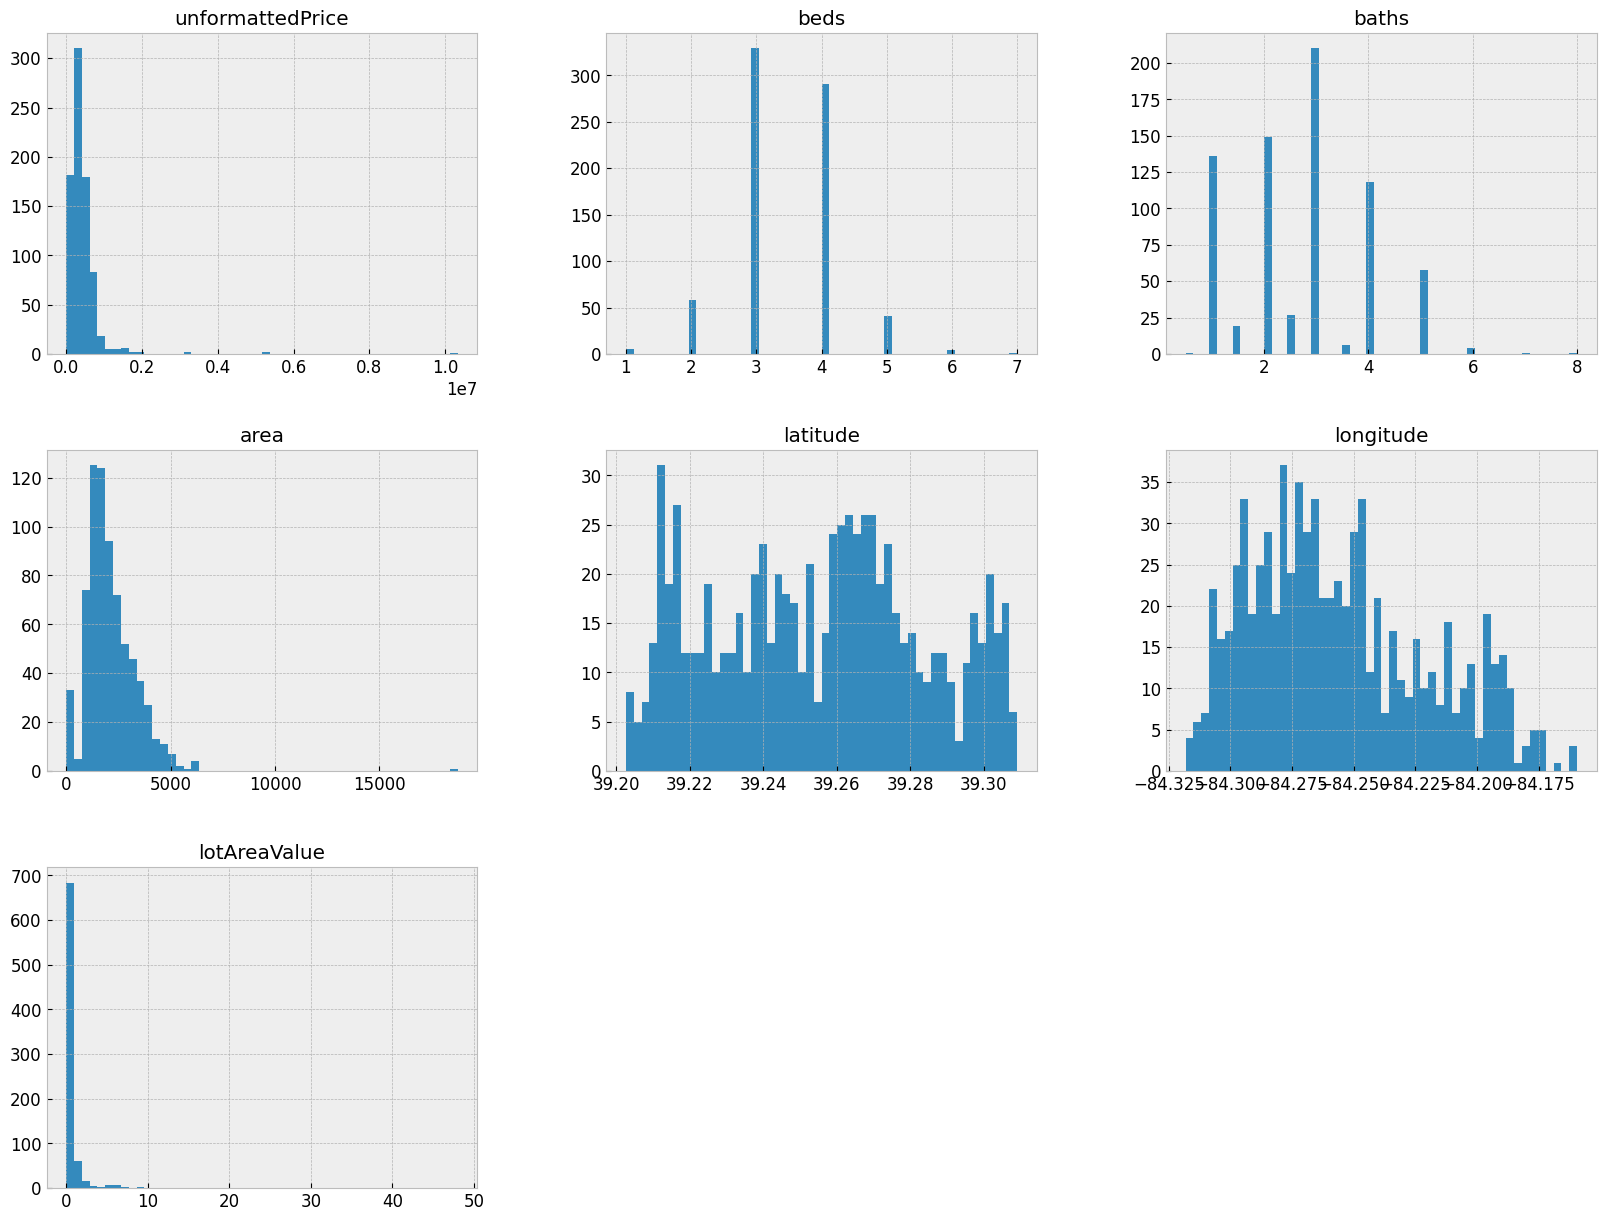

In [63]:
houses.hist(bins=50, figsize=(20,15))

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [65]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python LovelandHousing.ipynb

[NbConvertApp] Converting notebook LovelandHousing.ipynb to python
[NbConvertApp] Writing 14411 bytes to LovelandHousing.py
